# Assignment Advanced Regression

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [147]:
df_house = pd.read_csv('train.csv')
df_house[:5]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL      65.0000     8450   Pave   NaN      Reg   
1   2          20       RL      80.0000     9600   Pave   NaN      Reg   
2   3          60       RL      68.0000    11250   Pave   NaN      IR1   
3   4          70       RL      60.0000     9550   Pave   NaN      IR1   
4   5          60       RL      84.0000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    196.0000        Gd        TA      PConc       Gd       TA           No   
1      0.0000        TA        TA     CBlock       Gd       TA           Gd   
2    162.0000        Gd        TA      PConc       Gd       TA           Mn   
3      0.0000        TA        TA     BrkTil       TA       Gd           No   
4    350.0000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [148]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Exploration

In [149]:
df_house['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [150]:
house_numeric = df_house.select_dtypes(include=['number'])
house_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60      65.0000     8450            7            5       2003   
1   2          20      80.0000     9600            6            8       1976   
2   3          60      68.0000    11250            7            5       2001   
3   4          70      60.0000     9550            7            5       1915   
4   5          60      84.0000    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003    196.0000         706           0        150          856   
1          1976      0.0000         978           0        284         1262   
2          2002    162.0000         486           0        434          920   
3          1970      0.0000         216           0        540          756   
4          2000    350.0000         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0    2003.0000           2         548           0           61   
1    1976.0000           2         460         298            0   
2    2001.0000           2         608           0           42   
3    1998.0000           3         642           0           35   
4    2000.0000           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [151]:
cat_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
            'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
            'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 
            'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 
            'BsmtQual', 'BsmtExposure', 'Heating', 'CentralAir', 'Electrical', 
            'KitchenQual', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']

## Plot the categories

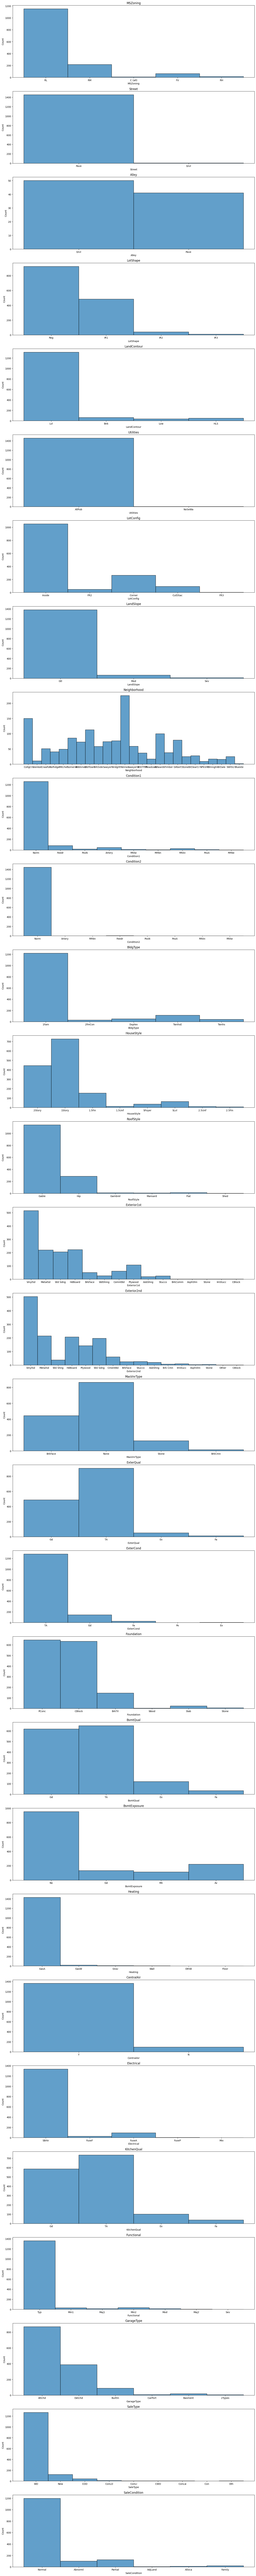

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(15, 150)) 
for i, col in enumerate(cat_cols):
    ax = axs[i]  
    sns.histplot(data=df_house, x=col, discrete=True, ax=ax,
                  alpha=0.7)
    ax.set_title(col)

plt.tight_layout()
plt.show()

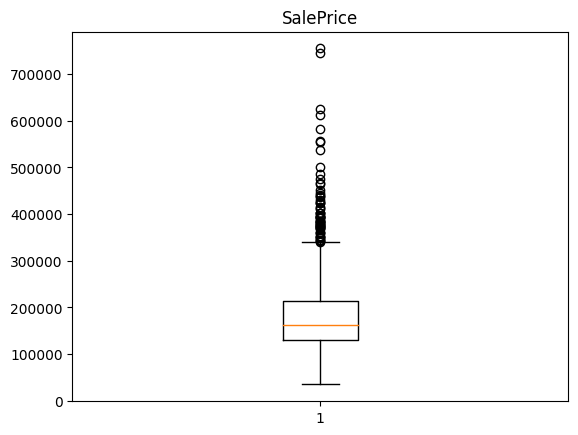

In [153]:
plt.boxplot(df_house['SalePrice'])

plt.title('SalePrice')

plt.show()

## Pairplot with sales price

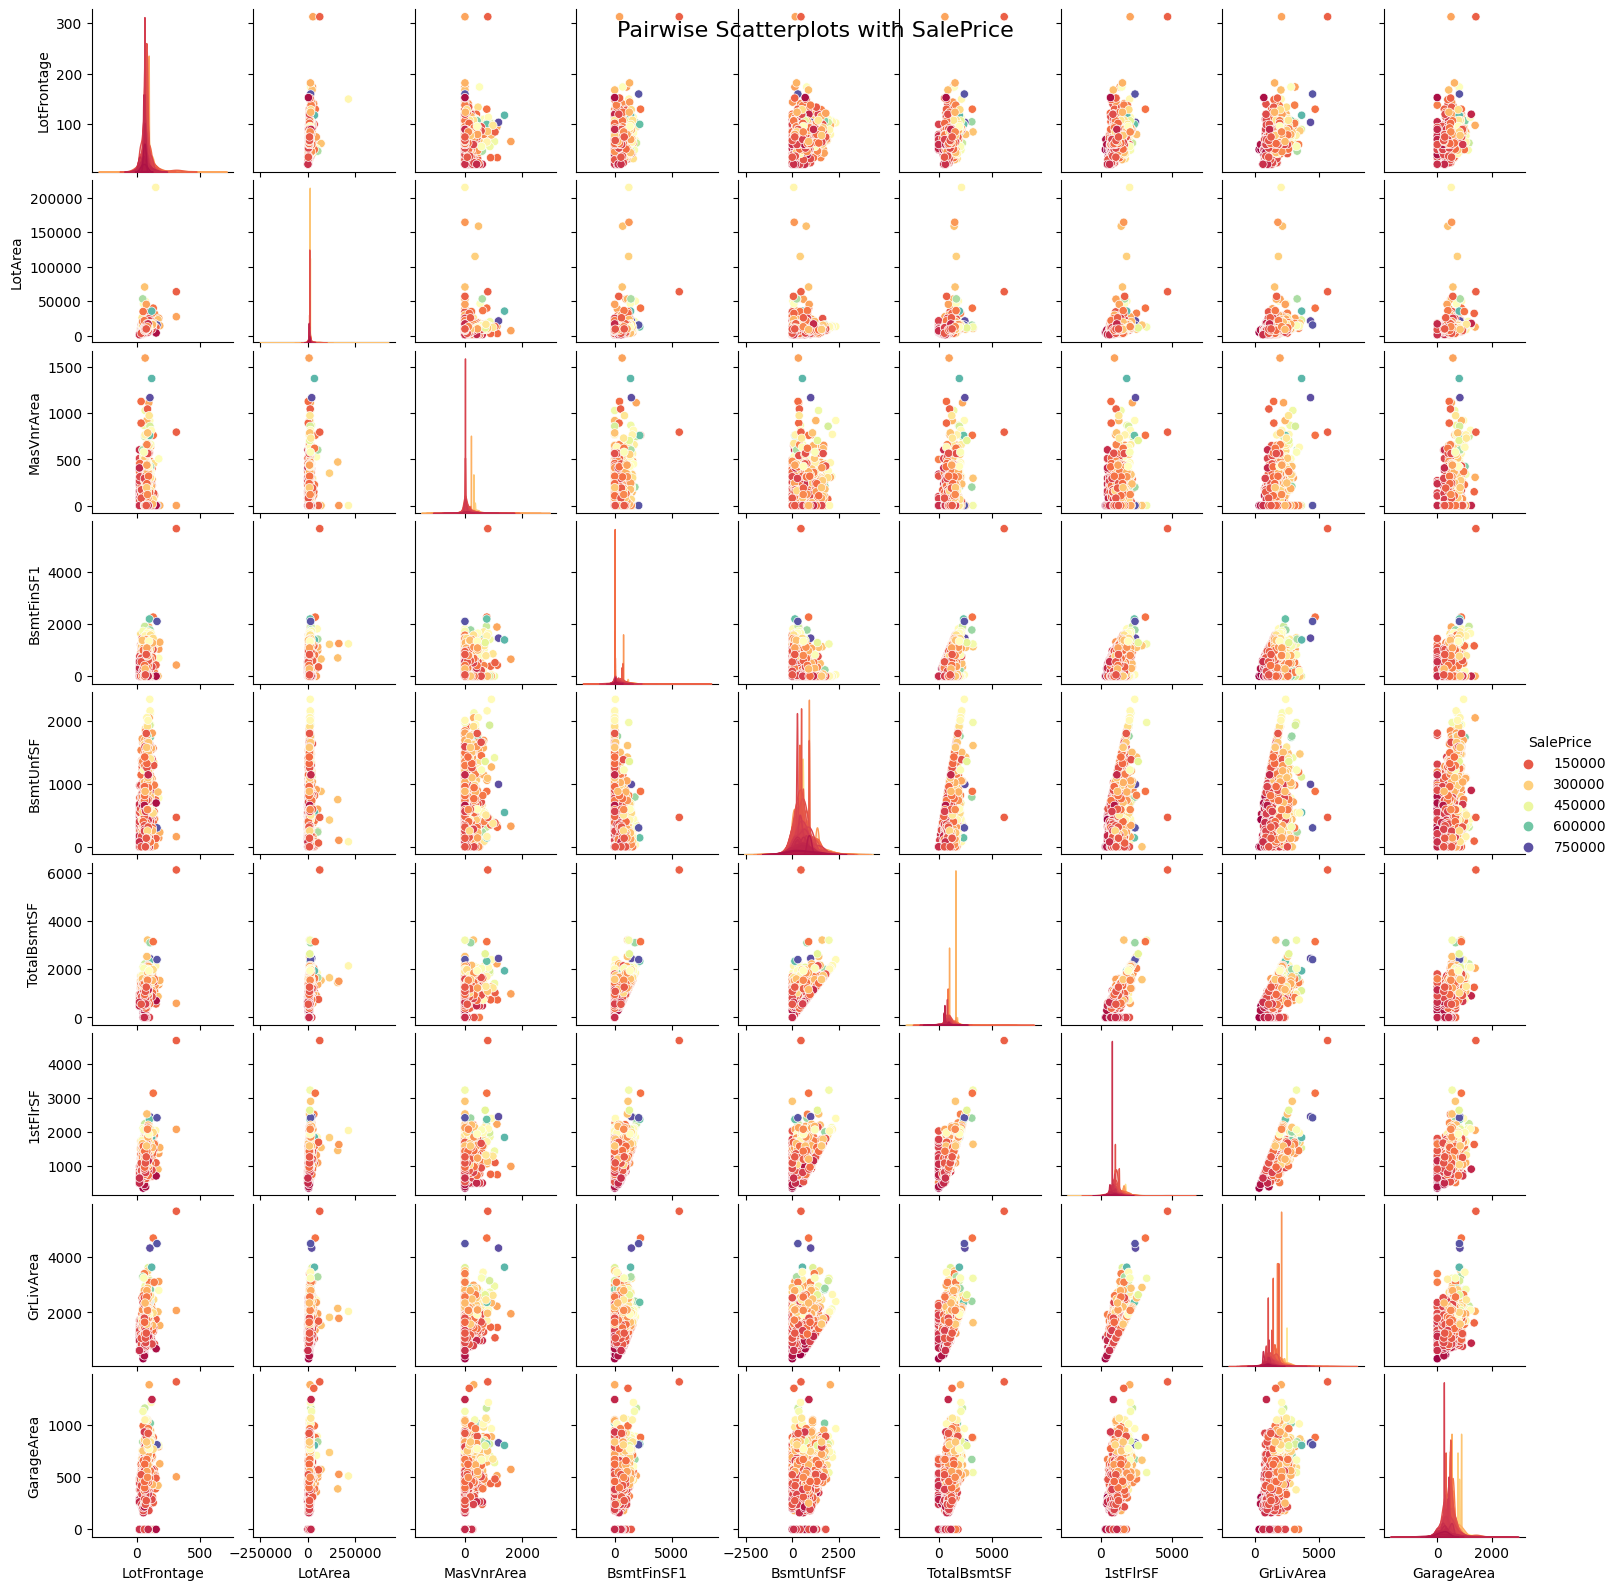

In [154]:
num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 
            'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'SalePrice']


grid = sns.pairplot(df_house[num_cols], 
                    hue="SalePrice",
                   palette='Spectral') 

grid.fig.set_size_inches(16,16)
grid.fig.suptitle('Pairwise Scatterplots with SalePrice', fontsize=16)

plt.show()

# Correlation Heatmap

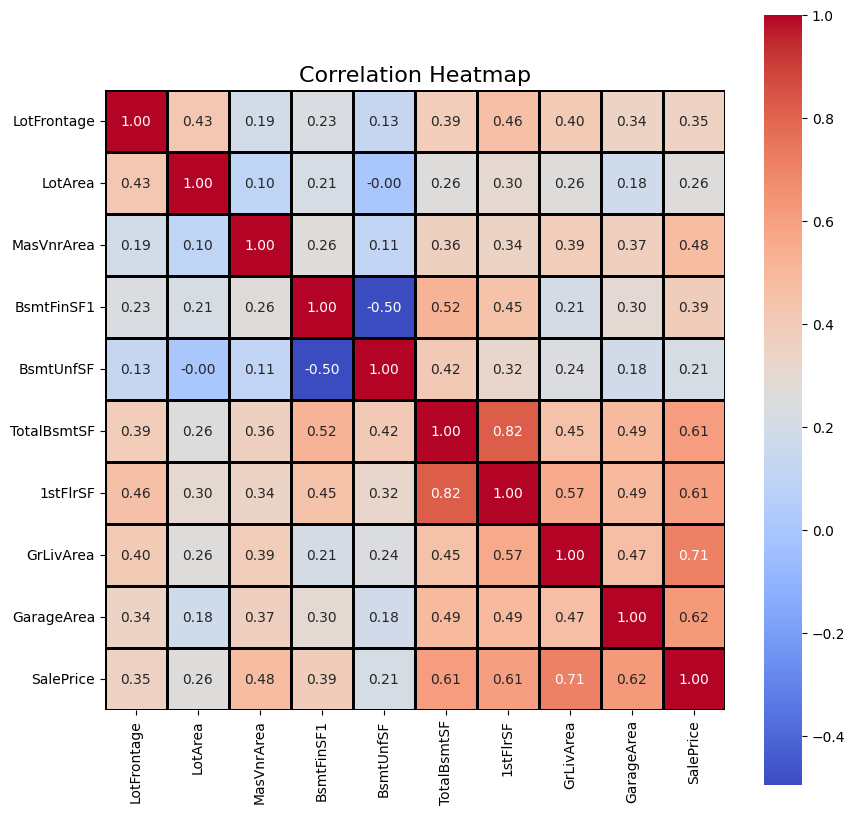

In [155]:
corr_matrix = df_house[num_cols].corr()

plt.figure(figsize=(10,10))  
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=1, linecolor='black')

plt.title('Correlation Heatmap', fontsize=16)

plt.show()

# Handle missing data

In [156]:
missing_values = df_house.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Drop the missing data of Electrical due to data is not complete

In [157]:
# Drop electrical data
df_house = df_house.dropna(subset=['Electrical'])

In [158]:
# Drop the cols if data is missing

cols_to_drop = missing_values[missing_values > 1].index
df_house_clean = df_house.drop(columns=cols_to_drop)

missing = df_house_clean.isnull().sum().max()
missing

0

### Drop variables that highly correlated

In [159]:
df_house_clean = df_house_clean.drop(columns=['1stFlrSF'])

### Drop the outliners of salePrice

In [160]:
df_house_clean = df_house_clean[df_house_clean['SalePrice'] <= 700000]

In [161]:
df_house_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1457 non-null   int64 
 1   MSSubClass     1457 non-null   int64 
 2   MSZoning       1457 non-null   object
 3   LotArea        1457 non-null   int64 
 4   Street         1457 non-null   object
 5   LotShape       1457 non-null   object
 6   LandContour    1457 non-null   object
 7   Utilities      1457 non-null   object
 8   LotConfig      1457 non-null   object
 9   LandSlope      1457 non-null   object
 10  Neighborhood   1457 non-null   object
 11  Condition1     1457 non-null   object
 12  Condition2     1457 non-null   object
 13  BldgType       1457 non-null   object
 14  HouseStyle     1457 non-null   object
 15  OverallQual    1457 non-null   int64 
 16  OverallCond    1457 non-null   int64 
 17  YearBuilt      1457 non-null   int64 
 18  YearRemodAdd   1457 non-null

# Data Preparation

In [204]:
df_copy = df_house_clean.copy()

X = df_copy.drop(['SalePrice', 'Id'], axis=1)

y = df_copy['SalePrice']

In [205]:
X.sample(5)

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
15           45       RM     6120   Pave      Reg         Lvl    AllPub   
97           20       RL    10921   Pave      Reg         HLS    AllPub   
273          20       RL     9600   Pave      Reg         Lvl    AllPub   
921          90       RL     8777   Pave      Reg         Lvl    AllPub   
274          20       RL     8314   Pave      Reg         Lvl    AllPub   

    LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
15     Corner       Gtl      BrkSide       Norm       Norm     1Fam   
97     Inside       Gtl      Edwards       Norm       Norm     1Fam   
273    Inside       Gtl        NAmes      Feedr       Norm     1Fam   
921    Inside       Gtl      Edwards      Feedr       Norm   Duplex   
274    Corner       Gtl      Mitchel       Norm       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
15      1.5Unf            7            8       1929          2001     Gable   
97      1Story            4            5       1965          1965       Hip   
273     1Story            6            6       1958          1988       Hip   
921     1.5Fin            5            7       1900          2003     Gable   
274     1Story            5            7       1982          1982     Gable   

    RoofMatl Exterior1st Exterior2nd ExterQual ExterCond Foundation  \
15   CompShg     Wd Sdng     Wd Sdng        TA        TA     BrkTil   
97   CompShg     HdBoard     HdBoard        TA        TA     CBlock   
273  CompShg     Wd Sdng     Wd Sdng        TA        TA     CBlock   
921  CompShg     MetalSd     MetalSd        TA        TA     CBlock   
274  CompShg     HdBoard     ImStucc        TA        TA     CBlock   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
15            0           0        832          832    GasA        Ex   
97          520           0        440          960    GasA        TA   
273         620         620          0         1240    GasA        Gd   
921        1084           0        188         1272    GasA        Gd   
274         546           0        270          816    GasA        TA   

    CentralAir Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
15           Y      FuseA         0             0        854             0   
97           Y      FuseF         0             0        960             1   
273          Y      SBrkr         0             0       1632             1   
921          Y      SBrkr       928             0       2200             2   
274          Y      SBrkr         0             0        816             0   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
15              0         1         0             2             1          TA   
97              0         1         0             3             1          TA   
273             0         2         0             3             1          TA   
921             0         2         2             4             2          TA   
274             0         1         0             2             1          TA   

     TotRmsAbvGrd Functional  Fireplaces  GarageCars  GarageArea PavedDrive  \
15              5        Typ           0           2         576          Y   
97              6        Typ           0           1         432          P   
273             6       Min1           1           1         338          Y   
921             9        Typ           0           0           0          N   
274             5        Typ           0           1         264          Y   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
15           48          112              0          0            0         0   
97          120            0              0          0            0         0   
273         289            0              0          0            0         0   
921           0           70   

In [206]:
# creating dummy variables for categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd ExterQual ExterCond Foundation Heating HeatingQC  \
0     VinylSd     VinylSd        Gd        TA      PConc    GasA        Ex   
1     MetalSd     MetalSd        TA        TA     CBlock    GasA        Ex   
2     VinylSd     VinylSd        Gd        TA      PConc    GasA        Ex   
3     Wd Sdng     Wd Shng        TA        TA     BrkTil    GasA        Gd   
4     VinylSd     VinylSd        Gd        TA      PConc    GasA        Ex   

  CentralAir Electrical KitchenQual Functional PavedDrive SaleType  \
0          Y      SBrkr          Gd        Typ          Y       WD   
1          Y      SBrkr          TA        Typ          Y       WD   
2          Y      SBrkr          Gd        Typ          Y       WD   
3          Y      SBrkr          Gd        Typ          Y       WD   
4          Y      SBrkr          Gd        Typ          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [207]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0  

In [208]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [209]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=191)

In [210]:
X.sample(5)

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1390      3.1452   0.0294      -0.0688       1.2792    -2.1926        0.7344   
295       0.5463  -0.2574      -0.0688       0.3810     0.4235       -0.0405   
83       -0.8713  -0.1617      -0.7955      -0.5172    -0.3713       -1.2028   
6        -0.8713  -0.0423       1.3846      -0.5172     1.0858        0.9766   
711       1.4914  -0.5845       1.3846      -0.5172     0.5560        0.2017   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  LowQualFinSF  \
1390     -0.9751     -0.2890    -0.1929      -1.3174    0.8008       -0.1204   
295       0.8312     -0.2890    -0.8672      -0.1217   -0.7965       -0.1204   
83       -0.9751     -0.2890     1.1262       0.0206   -0.7965       -0.1204   
6         2.0442     -0.2890    -0.5663       1.4458   -0.7965       -0.1204   
711       0.7165     -0.2890    -0.2404       0.3947   -0.7965       -0.1204   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1390     0.7777       -0.8202       -0.2397    0.7969   -0.7595        0.1659   
295     -0.9878        1.1073       -0.2397   -1.0259   -0.7595        0.1659   
83      -0.8674       -0.8202       -0.2397   -1.0259    1.2308        0.1659   
6        0.3543        1.1073       -0.2397    0.7969   -0.7595        0.1659   
711     -0.5508        1.1073       -0.2397    0.7969   -0.7595       -1.0608   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
1390        4.3239        0.3006      0.6043      0.3145      0.9340   
295        -0.2117       -0.3162     -0.9513      0.3145      0.5406   
83         -0.2117       -0.3162     -0.9513      0.3145     -0.0541   
6          -0.2117        0.3006      0.6043      0.3145      0.7654   
711        -0.2117       -0.9330      0.6043      0.3145     -0.0026   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1390     -0.7508      -0.3269         3.1070    -0.1165      -0.2705   
295       0.2078      -0.7041        -0.3597    -0.1165      -0.2705   
83       -0.1597      -0.7041        -0.3597    -0.1165      -0.2705   
6         1.2862       0.1559        -0.3597    -0.1165      -0.2705   
711       0.5912       1.1063        -0.3597    -0.1165      -0.2705   

      PoolArea  MiscVal  MoSold  YrSold  MSZoning_FV  MSZoning_RH  \
1390   -0.0635  -0.0878 -0.8610  0.1379      -0.2161      -0.1054   
295    -0.0635  -0.0878 -1.2311 -1.3674      -0.2161      -0.1054   
83     -0.0635  -0.0878  0.2495 -0.6147      -0.2161      -0.1054   
6      -0.0635  -0.0878  0.6196 -0.6147      -0.2161      -0.1054   
711    -0.0635  -0.0878  1.3599  0.1379      -0.2161      -0.1054   

      MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
1390      -1.9275       2.3840       0.0643       -0.1702       -0.0831   
295        0.5188      -0.4195       0.0643       -0.1702       -0.0831   
83         0.5188      -0.4195       0.0643       -0.1702       -0.0831   
6          0.5188      -0.4195       0.0643       -0.1702       -0.0831   
711        0.5188      -0.4195       0.0643       -0.1702       -0.0831   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
1390        0.7595          -0.1885          -0.1592           0.3375   
295        -1.3167          -0.1885          -0.1592           0.3375   
83         -1.3167          -0.1885          -0.1592           0.3375   
6           0.7595          -0.1885          -0.1592           0.3375   
711        -1.3167           5.3047          -0.1592          -2.9629   

      Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
1390           -0.0262            -0.2626        -0.1826        -0.0525   
295            -0.0262             3.8079        -0.1826        -0.0525   
83             -0.0262            -0.2626        -0.1826        -0.0525   
6              -0.0262            -0.2626        -0.1826        -0.0525   
711        

In [211]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=42)

## Build the LR model

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [213]:
# Instantiate
lr = LinearRegression()

# Fit a line
lr.fit(X_train, y_train)

LinearRegression()

In [214]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on the testing set
y_pred = lr.predict(X_test)

# Get the R^2 score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rss = np.sum(np.square(y_test - y_pred))
print(f'R2 Score: {r2}\nMSE: {mse}\nRSS: {rss}')

R2 Score: -4.613655073773736e+22
MSE: 2.727675157685915e+32
RSS: 1.1947217190664306e+35


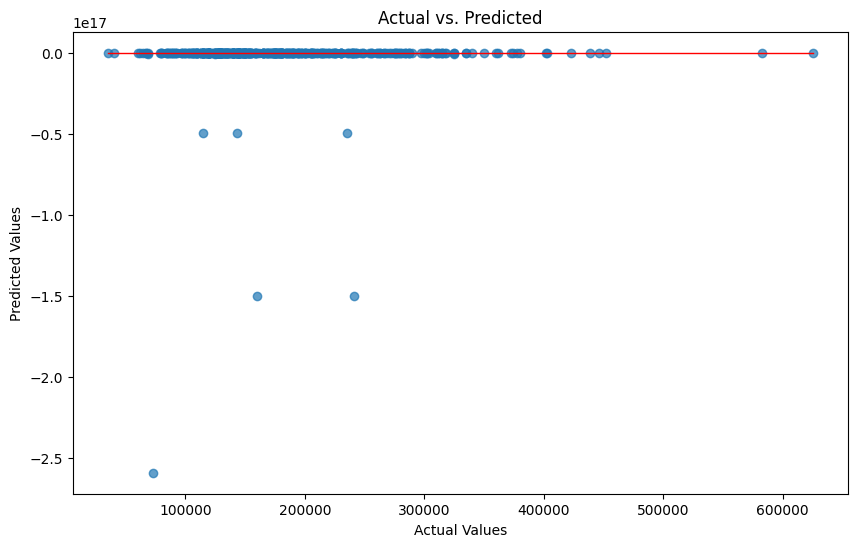

In [215]:
# Create a new figure
plt.figure(figsize=(10,6))

# Scatter plot of y_test (actual values) and y_pred (predicted values)
plt.scatter(y_test, y_pred, alpha=0.7)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=1)

# Labeling the axes and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')

# Display the plot
plt.show()

## Build the Ridge Regression Model

In [216]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [ 10, 20, 50, 100, 200, 400, 600, 800, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [10, 20, 50, 100, 200, 400, 600, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [217]:
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha['alpha']
print(best_alpha_value)

200


In [218]:
ridge = Ridge(alpha=best_alpha_value)

ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rss = np.sum(np.square(y_test - y_pred))
print(f'R2 Score: {r2}\nMSE: {mse}\nRSS: {rss}')

R2 Score: 0.7718253778101971
MSE: 1349009058.1314616
RSS: 590865967461.5802


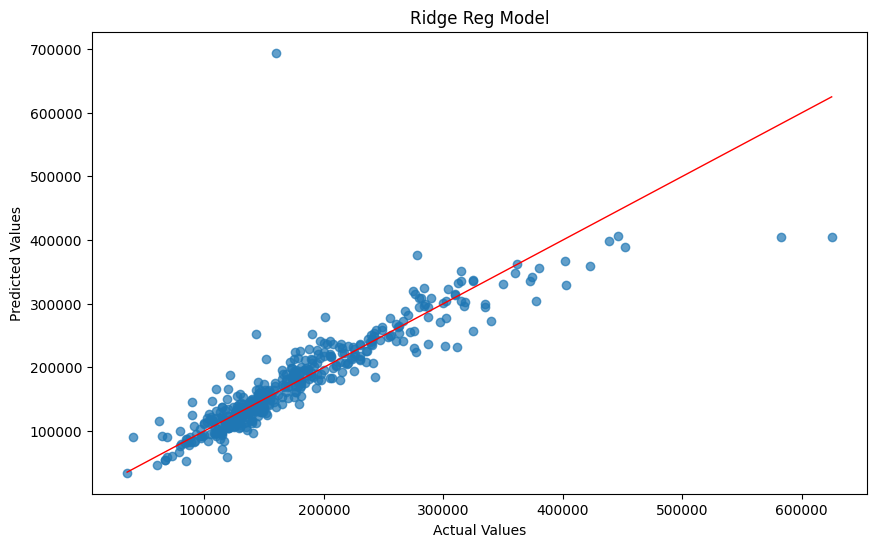

In [219]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_pred, alpha=0.7)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=1)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Reg Model')

plt.show()

## Build the Lasso Regression Model

In [220]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [10, 20, 50, 100, 200, 400, 600, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [221]:
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha['alpha']
best_alpha_value

400

In [222]:
lasso = Lasso(alpha=best_alpha_value)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rss = np.sum(np.square(y_test - y_pred))
print(f'R2 Score: {r2}\nMSE: {mse}\nRSS: {rss}')

R2 Score: 0.7625267492051819
MSE: 1403984208.7243762
RSS: 614945083421.2767


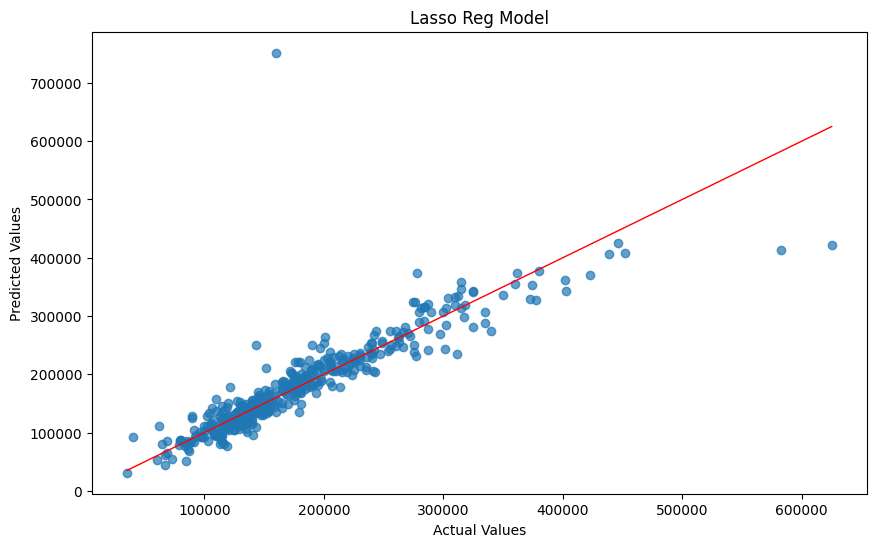

In [223]:
# Create a new figure
plt.figure(figsize=(10,6))

# Scatter plot of y_test (actual values) and y_pred (predicted values)
plt.scatter(y_test, y_pred, alpha=0.7)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=1)

# Labeling the axes and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Reg Model')

# Display the plot
plt.show()

In [224]:
best_alpha_lasso_value = 400
best_alpha_ridge_value = 200

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rss = np.sum(np.square(y_test - y_pred))
    return pd.DataFrame({model_name: [r2, mse, rss]}, index=['R2', 'MSE', 'RSS'])

lasso = Lasso(alpha=best_alpha_lasso_value)
ridge = Ridge(alpha=best_alpha_ridge_value)
linear = LinearRegression()

lasso_df = evaluate_model(lasso, X_train, y_train, X_test, y_test, 'Lasso Regression')
ridge_df = evaluate_model(ridge, X_train, y_train, X_test, y_test, 'Ridge Regression')
linear_df = evaluate_model(linear, X_train, y_train, X_test, y_test, 'Linear Regression')

pd.options.display.float_format = '{:.4f}'.format
result_df = pd.concat([lasso_df, ridge_df, linear_df], axis=1)
result_df

Lasso Regression  Ridge Regression  \
R2             0.7625            0.7718   
MSE   1403984208.7244   1349009058.1315   
RSS 614945083421.2767 590865967461.5802   

                            Linear Regression  
R2              -46136550737737357983744.0000  
MSE    272767515768591485724906879975424.0000  
RSS 119472171906643063613807403674370048.0000

## Show Features importance with using Lasso estimator

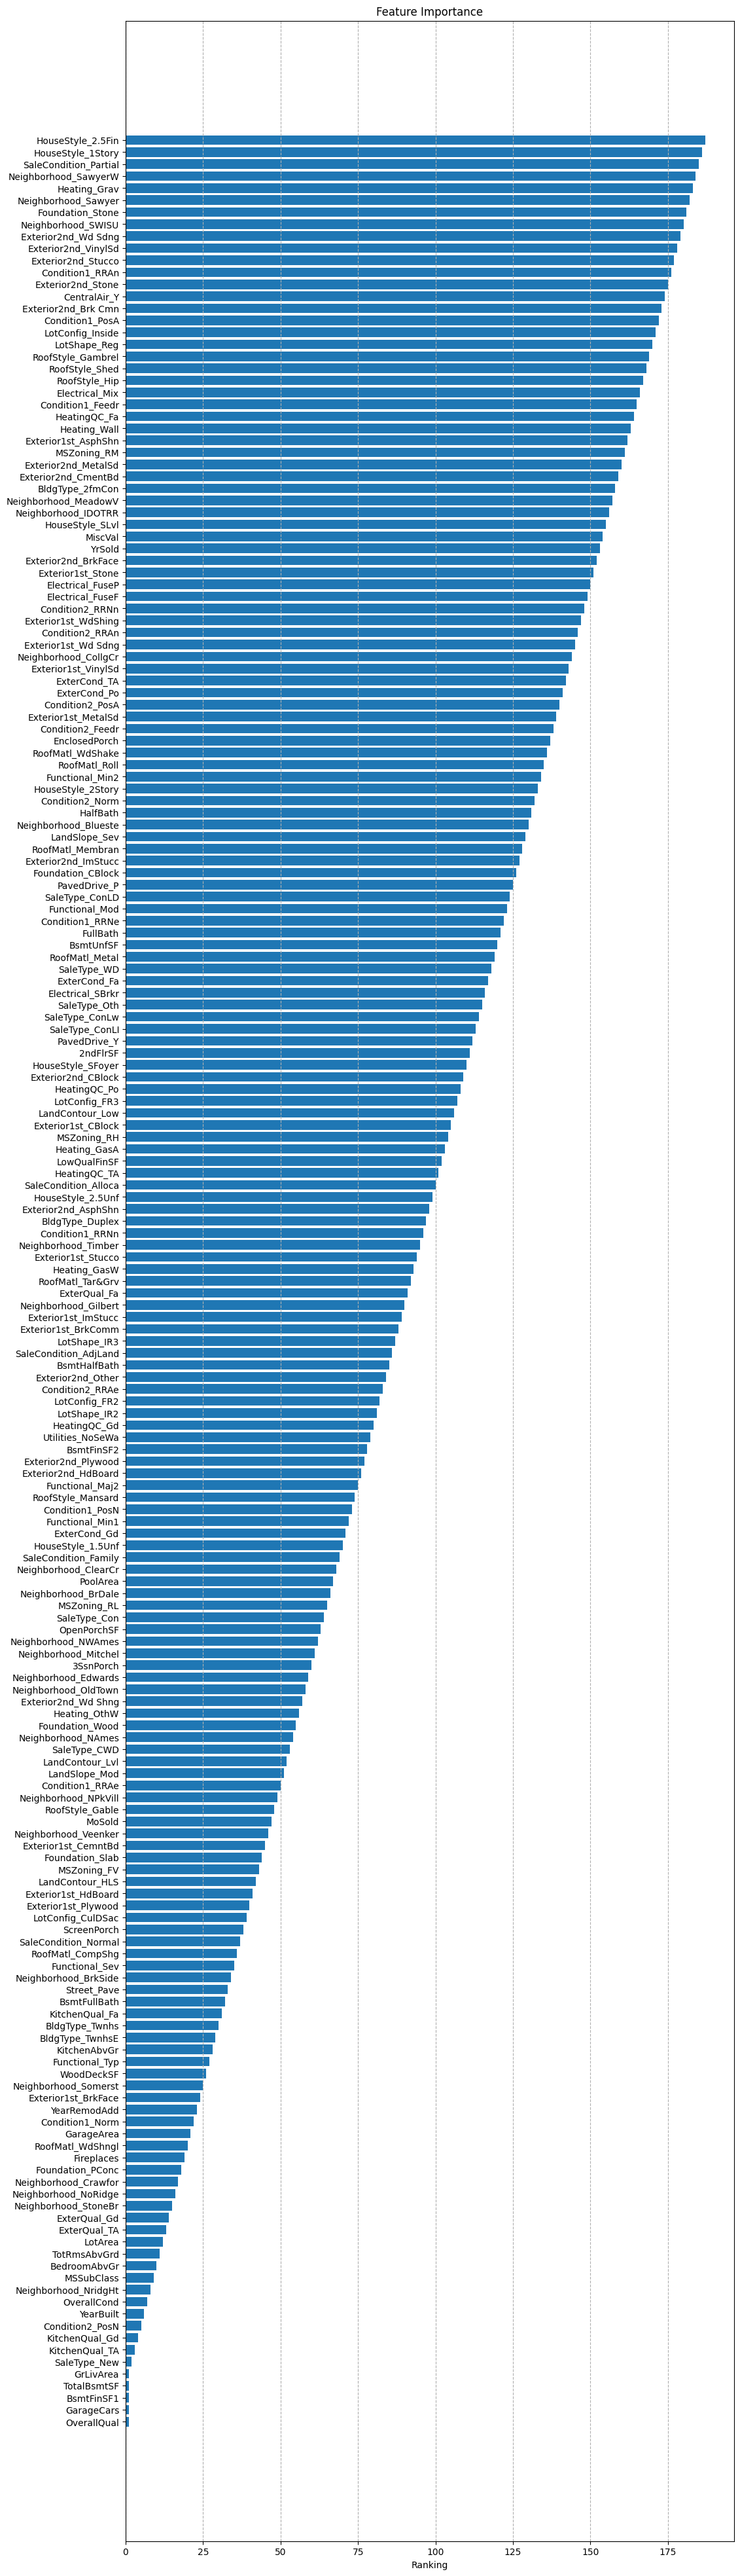

In [225]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=lasso, n_features_to_select=5)
rfe.fit(X_train, y_train)

sorted_indices = np.argsort(rfe.ranking_)

sorted_ranking = rfe.ranking_[sorted_indices]
sorted_columns = X_train.columns[sorted_indices]

# Plot feature ranking:
plt.figure(figsize=(12, 50))
plt.barh(sorted_columns, sorted_ranking)
plt.xlabel('Ranking')
plt.title('Feature Importance')
plt.grid(axis='x', linestyle='--')
plt.show()

## Show VIF

/opt/conda/envs/pycaret_full/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


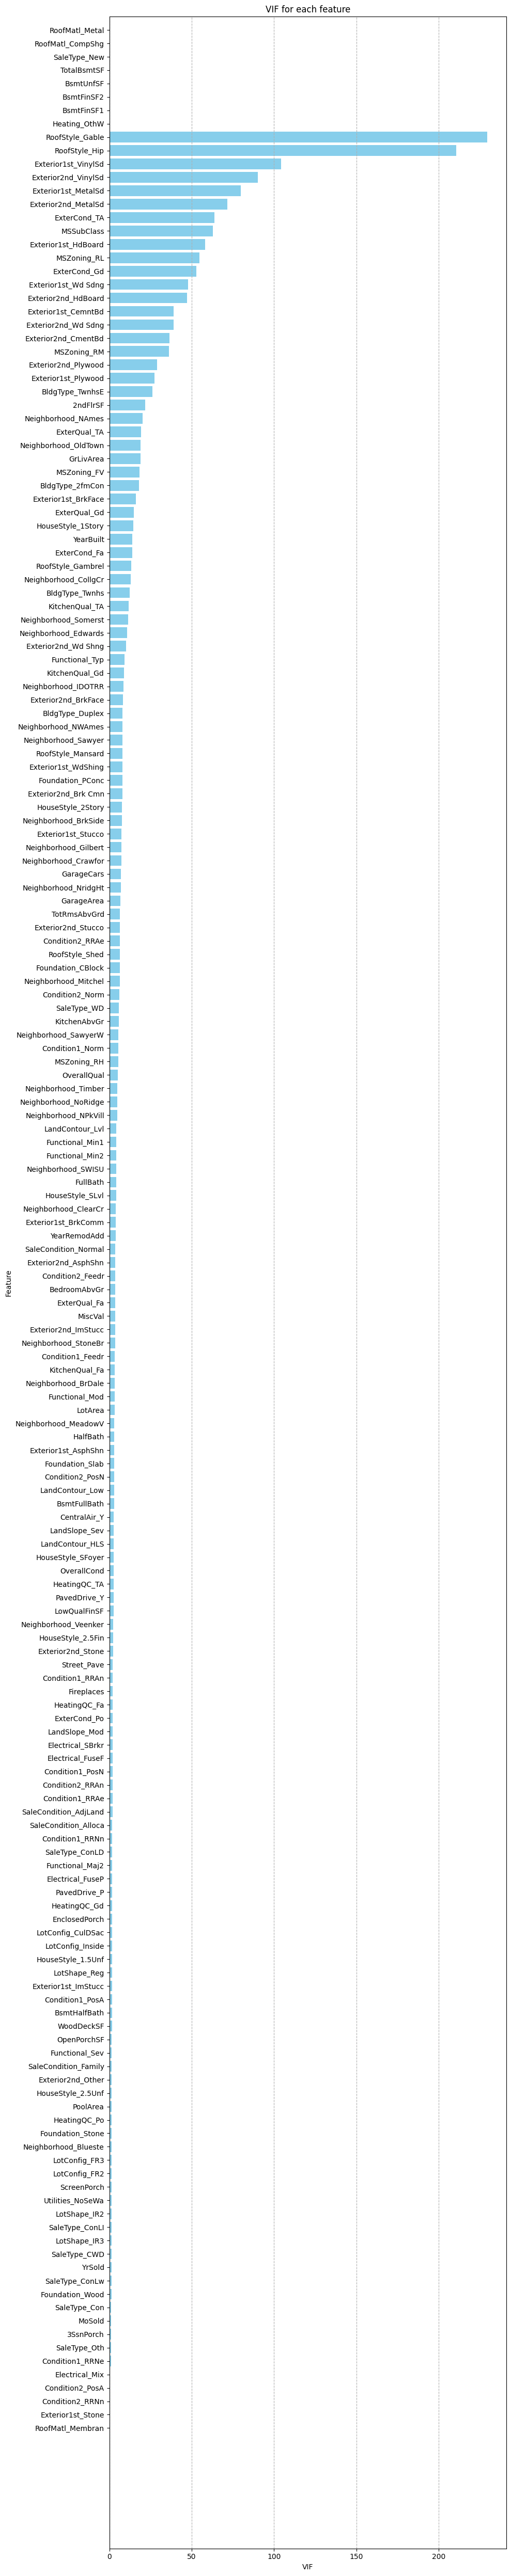

In [226]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data = vif_data.sort_values(by="VIF")

# Plotting
plt.figure(figsize=(10, 50))
plt.barh(vif_data["Feature"], vif_data["VIF"], color='skyblue')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.title('VIF for each feature')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

## Reselect the features to train the model

In [228]:
# Select Top features
df_copy = df_house_clean.copy()

X = df_copy[['OverallQual',
             'GarageCars',
             'TotalBsmtSF',
             'GrLivArea',
             'SaleType',
             'KitchenQual',
             'Condition2',
             'YearBuilt',
            'OverallCond',
             'Neighborhood',
             'MSSubClass',
             'BedroomAbvGr',
             'TotRmsAbvGrd',
             'LotArea',
             'ExterQual',
             'Foundation',
             'Fireplaces',
             'GarageArea',
             'Condition1']]

y = df_copy['SalePrice']

In [229]:
# creating dummy variables for categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
0             0             0               0               0               0   
1             0             0               0               0               0   
2             0             0               0               0               0   
3             0             0               0               0               0   
4             0             0               0               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  KitchenQual_Fa  KitchenQual_Gd  \
0             0             0            1               0               1   
1             0             0            1               0               0   
2             0             0            1               0               1   
3             0             0            1               0               1   
4             0             0            1               0               1   

   KitchenQual_TA  Condition2_Feedr  Condition2_Norm  Condition2_PosA  \
0               0                 0                1                0   
1               1                 0                1                0   
2               0                 0                1                0   
3               0                 0                1                0   
4               0                 0                1                0   

   Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWIS

In [230]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [231]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=42)

### Retrain model to find best alpha

In [240]:
params = {'alpha': [ 10, 20, 50, 100, 200, 400, 600, 800, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [10, 20, 50, 100, 200, 400, 600, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [241]:
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha['alpha']
print(best_alpha_value)

20


In [242]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [10, 20, 50, 100, 200, 400, 600, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [243]:
best_alpha = model_cv.best_params_
best_alpha_value = best_alpha['alpha']
print(best_alpha_value)

400


In [244]:
best_alpha_lasso_value = 400
best_alpha_ridge_value = 20

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rss = np.sum(np.square(y_test - y_pred))
    return pd.DataFrame({model_name: [r2, mse, rss]}, index=['R2', 'MSE', 'RSS'])

lasso = Lasso(alpha=best_alpha_lasso_value)
ridge = Ridge(alpha=best_alpha_ridge_value)
linear = LinearRegression()

lasso_df = evaluate_model(lasso, X_train, y_train, X_test, y_test, 'Lasso Regression')
ridge_df = evaluate_model(ridge, X_train, y_train, X_test, y_test, 'Ridge Regression')
linear_df = evaluate_model(linear, X_train, y_train, X_test, y_test, 'Linear Regression')

result_df = pd.concat([lasso_df, ridge_df, linear_df], axis=1)
result_df

Lasso Regression  Ridge Regression  \
R2             0.7711            0.7718   
MSE   1353581839.9321   1349140886.2687   
RSS 592868845890.2571 590923708185.6830   

                          Linear Regression  
R2             -1904777916557865779200.0000  
MSE   11261386733130604242939469103104.0000  
RSS 4932487389111204208047524730109952.0000

## Question 1

### Use Lasso to plot the features importance

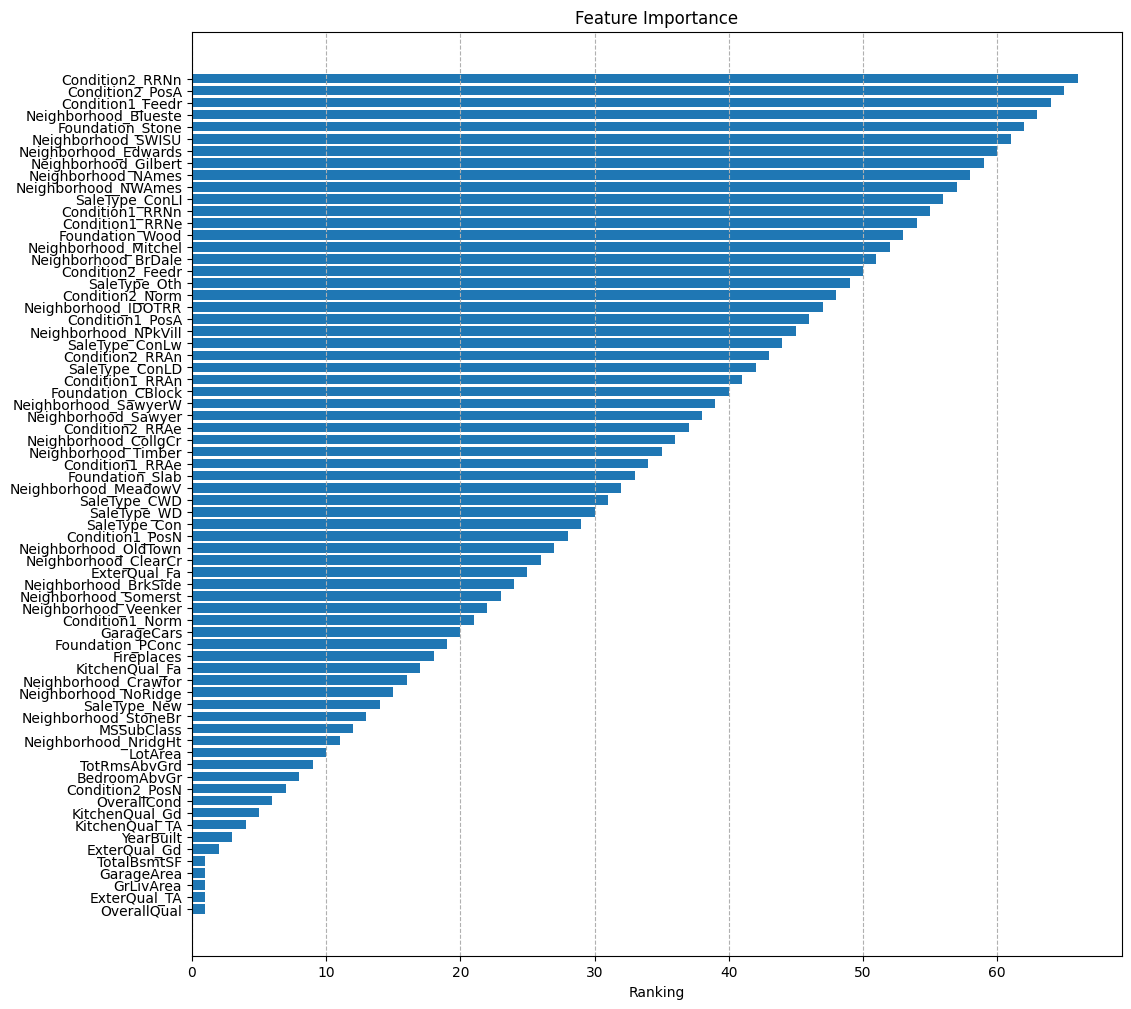

In [245]:
rfe = RFE(estimator=ridge, n_features_to_select=5)
rfe.fit(X_train, y_train)

sorted_indices = np.argsort(rfe.ranking_)

sorted_ranking = rfe.ranking_[sorted_indices]
sorted_columns = X_train.columns[sorted_indices]

# Plot feature ranking:
plt.figure(figsize=(12, 12))
plt.barh(sorted_columns, sorted_ranking)
plt.xlabel('Ranking')
plt.title('Feature Importance')
plt.grid(axis='x', linestyle='--')
plt.show()

### Double the Alpha

In [246]:
best_alpha_lasso_value = 800
best_alpha_ridge_value = 40

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rss = np.sum(np.square(y_test - y_pred))
    return pd.DataFrame({model_name: [r2, mse, rss]}, index=['R2', 'MSE', 'RSS'])

lasso = Lasso(alpha=best_alpha_lasso_value)
ridge = Ridge(alpha=best_alpha_ridge_value)
linear = LinearRegression()

lasso_df = evaluate_model(lasso, X_train, y_train, X_test, y_test, 'Lasso Regression')
ridge_df = evaluate_model(ridge, X_train, y_train, X_test, y_test, 'Ridge Regression')
linear_df = evaluate_model(linear, X_train, y_train, X_test, y_test, 'Linear Regression')

result_df = pd.concat([lasso_df, ridge_df, linear_df], axis=1)
result_df

Lasso Regression  Ridge Regression  \
R2             0.7727            0.7756   
MSE   1344042958.7290   1326694442.1595   
RSS 588690815923.3107 581092165665.8442   

                          Linear Regression  
R2             -1904777916557865779200.0000  
MSE   11261386733130604242939469103104.0000  
RSS 4932487389111204208047524730109952.0000

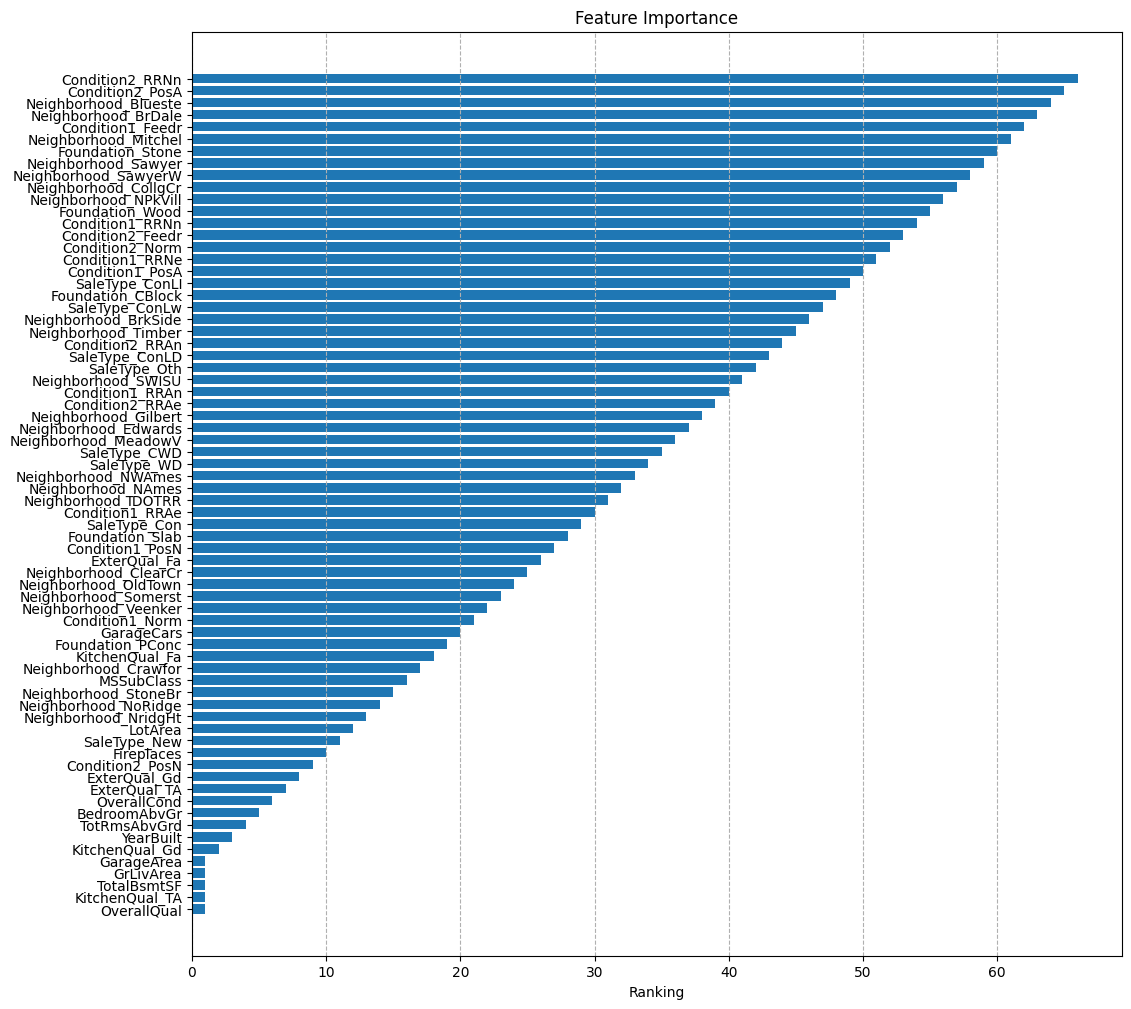

In [247]:
rfe = RFE(estimator=ridge, n_features_to_select=5)
rfe.fit(X_train, y_train)

sorted_indices = np.argsort(rfe.ranking_)

sorted_ranking = rfe.ranking_[sorted_indices]
sorted_columns = X_train.columns[sorted_indices]

# Plot feature ranking:
plt.figure(figsize=(12, 12))
plt.barh(sorted_columns, sorted_ranking)
plt.xlabel('Ranking')
plt.title('Feature Importance')
plt.grid(axis='x', linestyle='--')
plt.show()

## Question 3

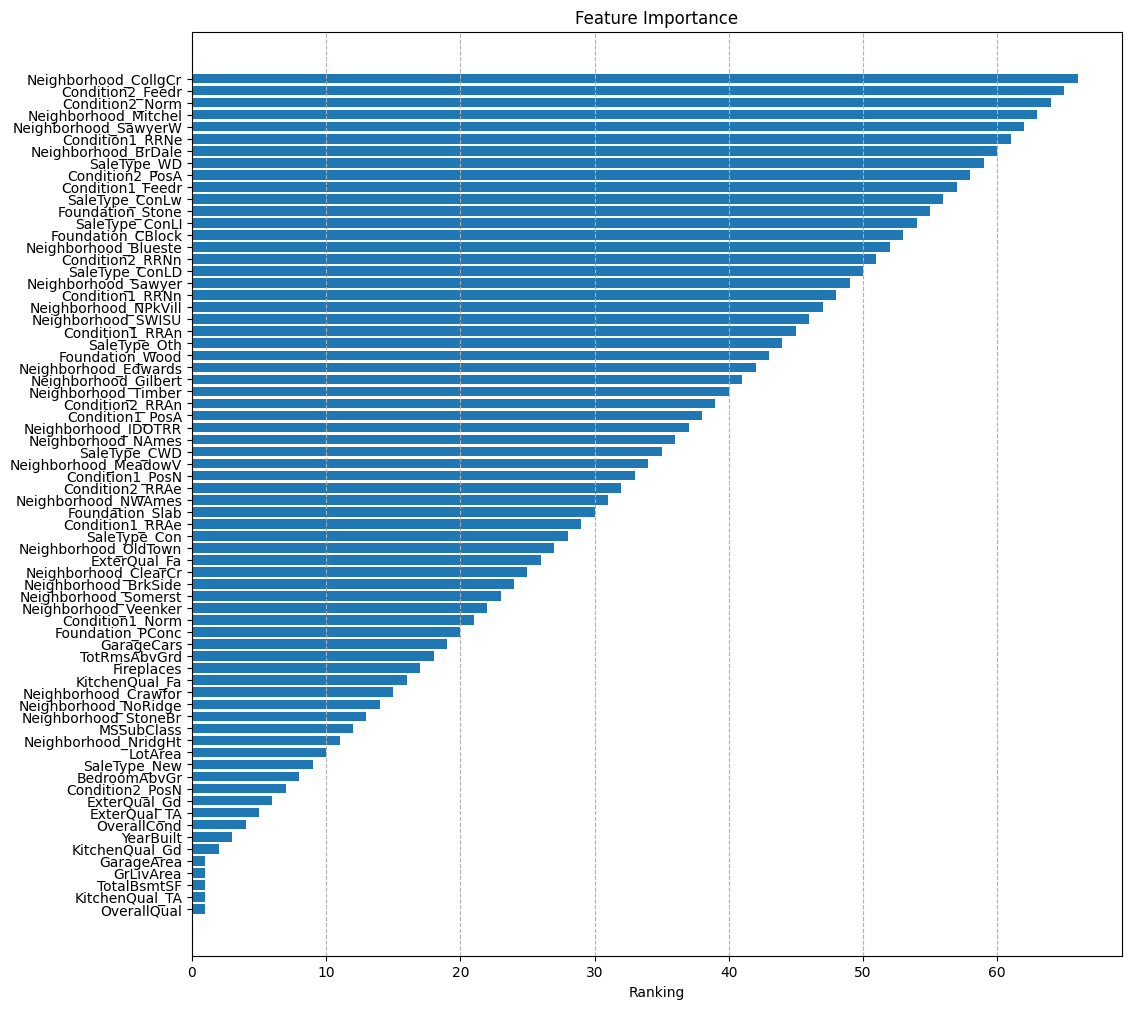

In [250]:
lasso = Lasso(alpha=400)

rfe = RFE(estimator=lasso, n_features_to_select=5)
rfe.fit(X_train, y_train)

sorted_indices = np.argsort(rfe.ranking_)

sorted_ranking = rfe.ranking_[sorted_indices]
sorted_columns = X_train.columns[sorted_indices]

# Plot feature ranking:
plt.figure(figsize=(12, 12))
plt.barh(sorted_columns, sorted_ranking)
plt.xlabel('Ranking')
plt.title('Feature Importance')
plt.grid(axis='x', linestyle='--')
plt.show()

In [262]:
# list top 5 features
cols_to_drop = sorted_columns[-5:]
cols_to_drop

Index(['Neighborhood_SawyerW', 'Neighborhood_Mitchel', 'Condition2_Norm',
       'Condition2_Feedr', 'Neighborhood_CollgCr'],
      dtype='object')

In [263]:
X_train_del5 = X_train.drop(cols_to_drop, axis=1)

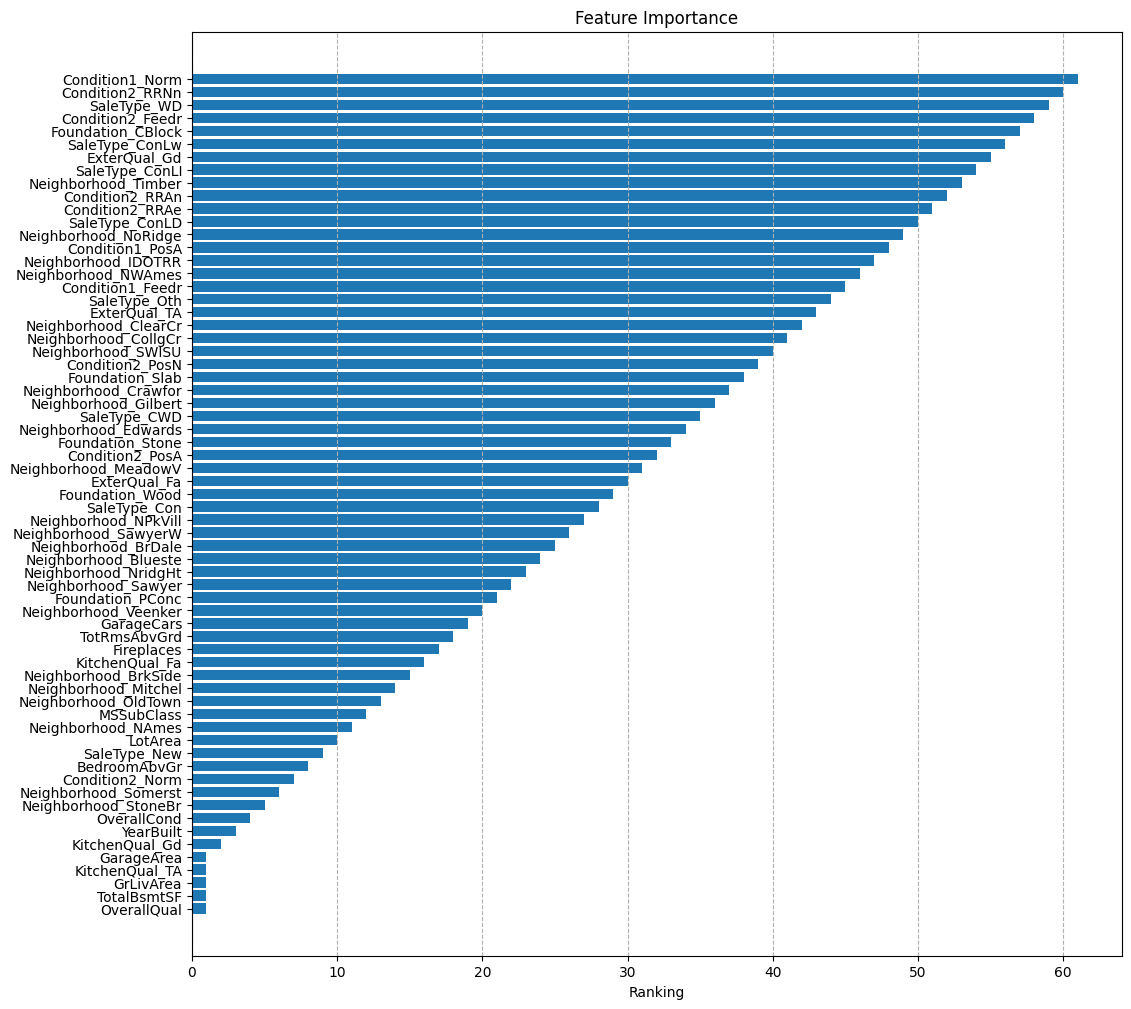

In [264]:
lasso = Lasso(alpha=400)

rfe = RFE(estimator=lasso, n_features_to_select=5)
rfe.fit(X_train_del5, y_train)

sorted_indices = np.argsort(rfe.ranking_)

sorted_ranking = rfe.ranking_[sorted_indices]
sorted_columns = X_train.columns[sorted_indices]

# Plot feature ranking:
plt.figure(figsize=(12, 12))
plt.barh(sorted_columns, sorted_ranking)
plt.xlabel('Ranking')
plt.title('Feature Importance')
plt.grid(axis='x', linestyle='--')
plt.show()

In [266]:
sorted_columns[-5:]

Index(['Foundation_CBlock', 'Condition2_Feedr', 'SaleType_WD',
       'Condition2_RRNn', 'Condition1_Norm'],
      dtype='object')